# Jeena Javahar

## Research question/interests

The following are research questions I am interested in:
1. How did the pandemic affect different communities
2. How did the ratio of deathshospitalizedases change over time? Did it get better or worse
3. How did the delta variant progress?

In [11]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#Making sure i can see all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
#importing function
import scripts.project_functions2 as pf

In [12]:
#loading the data
df=pf.load_and_process("../data/raw/raw_data.csv")
df.head()
df.to_csv('../data/processed/processed_data.csv')

## How did the ratio of deaths to hospitalized change over time? Did it get better or worse?


First, let us find out what ratio of hospitalized died

In [13]:
#creating a new column
df2=pf.get_ratio(df, 'deaths', 'total_hospitalized', 'ratio of deaths to total_hospitalized')
df2.head()

,ReportDate,TotalCases,CaseDelta,TotalTests,TestsDelta,PosTestPercent,PosPercentDiff,NegativeTests,NegDelta,bedsTotal,bedsAcute,bedsICU,bedsDelta,total_hospitalized,hospitalizedDelta,total_released,releasedDelta,caseAfrAmer,caseWhite,caseHispanic,caseAsian,caseOther,caseNotAVail,deaths,deathsDelta,deathDOD,deathAfrAmer,deathWhite,deathHispanic,pDeath70to79,pDeath80plus,pDeathAgeUnknown,pDeathGenMale,pDeathGenFemale,pDeathGenUnkn,pDeathAfrAmer,pDeathWhite,pDeathHispanic,pDeathAsian,pDeathOther,pDeathNotAvail,ratio of deaths to total_hospitalized
0,03/04/2020 03:00:00 PM,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/05/2020 03:00:00 PM,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/06/2020 03:00:00 PM,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03/07/2020 03:00:00 PM,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03/08/2020 02:00:00 PM,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let us visualize this data to draw conclusions

Text(0.5, 1.0, 'Delta Deaths')

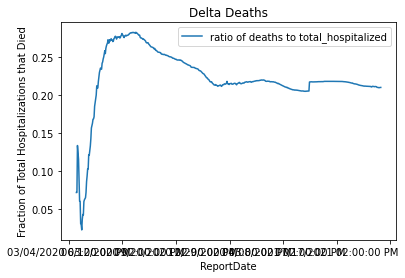

In [29]:
#plotting visualization
t=df2.plot(kind='line', x='ReportDate', y='ratio of deaths to total_hospitalized')
t.set_xlabel('ReportDate')
t.set_ylabel('Fraction of Total Hospitalizations that Died')
t.set_title('Delta Deaths')

### Conclusion

It looks like early on there were fewer deaths for total ospitalizations, but there was a steep hike, followed by a steep decline followed by another steep hike and finally a gradual decrease to date. No new unique observations or correlations were obtained.

## How did the pandemic affect different communities?


Another case where we can see the difference in the virus’ effect across demographics is with regard to race. 

In [23]:
df3=pd.read_csv("../data/raw/raw_data.csv")

In [24]:
df3=df3[['deathAfrAmer', 'deathWhite', 'deathHispanic', 'deathAsian','deathOther',]]

Text(0.5, 1.0, 'COVID-19 Death Toll in Maryland by Race ')

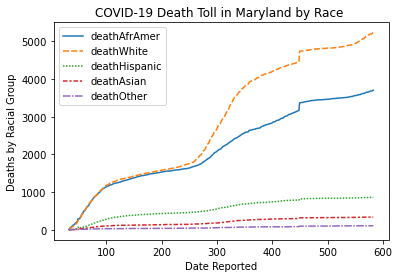

In [25]:
t=sns.lineplot(data=df3)
t.set_ylabel('Deaths by Racial Group')
t.set_xlabel('Date Reported')
t.set_title('COVID-19 Death Toll in Maryland by Race ')

Text(0.5, 1.0, 'COVID-19 Death Toll Relative to Population by Race')

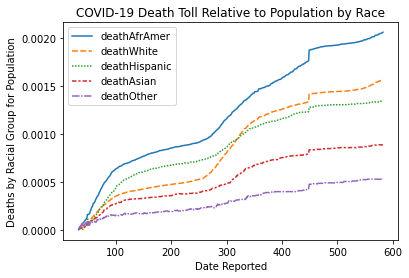

In [26]:
df3=pd.read_csv("../data/raw/raw_data.csv")
df3=df3[['deathAfrAmer', 'deathWhite', 'deathHispanic', 'deathAsian','deathOther',]]
df3['deathAfrAmer']=df3['deathAfrAmer']/1799094
df3['deathWhite']=df3['deathWhite']/3343003
df3['deathHispanic']=df3['deathHispanic']/643171
df3['deathAsian']=df3['deathAsian']/383867
df3['deathOther']=df3['deathOther']/208246
t=sns.lineplot(data=df3)
t.set_ylabel('Deaths by Racial Group for Population')
t.set_xlabel('Date Reported')
t.set_title('COVID-19 Death Toll Relative to Population by Race')

### Conclusion

The first figure shows that the White community was most affected, followed by the AfricanAmerican community, followed by Hispanic, Asian and others. However if we take a look at the second figure that takes into account the population distribution by race of Maryland, we can infer that the worst affected group was African American, followed by Hispanic and then White. We can reasonably conclude the hypothesis, that the pandemic disproportionately affected communities of color.

## How did the delta variant progress?

Now let us see the trend in the fraction of deaths caused by the delta variant on the y axis over time on the x axis.We need to know the ratio of delta cases to the total number of cases

In [27]:
df4=pf.get_ratio(df2, 'deathsDelta', 'deaths', 'rDelta')
df4.head()

,ReportDate,TotalCases,CaseDelta,TotalTests,TestsDelta,PosTestPercent,PosPercentDiff,NegativeTests,NegDelta,bedsTotal,bedsAcute,bedsICU,bedsDelta,total_hospitalized,hospitalizedDelta,total_released,releasedDelta,caseAfrAmer,caseWhite,caseHispanic,caseAsian,caseOther,caseNotAVail,deaths,deathsDelta,deathDOD,deathAfrAmer,deathWhite,deathHispanic,pDeath70to79,pDeath80plus,pDeathAgeUnknown,pDeathGenMale,pDeathGenFemale,pDeathGenUnkn,pDeathAfrAmer,pDeathWhite,pDeathHispanic,pDeathAsian,pDeathOther,pDeathNotAvail,ratio of deaths to total_hospitalized,rDelta
0,03/04/2020 03:00:00 PM,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/05/2020 03:00:00 PM,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/06/2020 03:00:00 PM,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03/07/2020 03:00:00 PM,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03/08/2020 02:00:00 PM,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us see the trend in the fraction of deaths caused by the delta variant on the y axis over time on the x axis.

Now, let us visualize this data

Text(0.5, 1.0, 'Delta Variant Effect on Deaths')

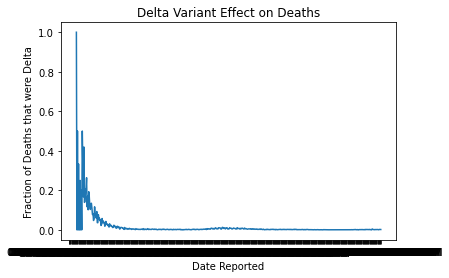

In [32]:
t=sns.lineplot(
    data=df4, x="ReportDate", y=df4['deathsDelta']/ df4['deaths'],
)
t.set_ylabel('Fraction of Deaths that were Delta')
t.set_xlabel('Date Reported')
t.set_title('Delta Variant Effect on Deaths')

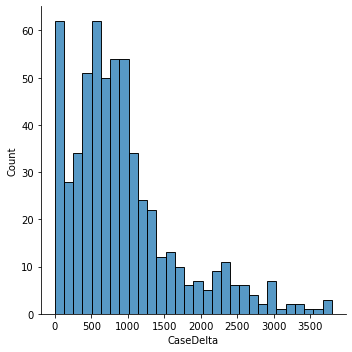

In [37]:
t=sns.displot(df4['CaseDelta'],kde= False, bins=30)

### Conclusion

It is evident that at present the delta variant is slowly becoming responsible for a greater fraction of deaths than ever before, likely because of the vaccines being less effective against the variant. 
The second figure shows that the number of reported cases took a spike during November to January, a gradual decrease until June 2021, at which point it spiked again. The second spike was not as high as the one during the winter of 2020, likely due to higher vaccination rates and more informed restrictions implemented by health authorities. These findings are consistent with our knowledge of the first and second waves in the United States. No discrepancies with public knowledge regarding the pandemic were found. 